In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv


#### Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor,GammaRegressor,Lasso,GammaRegressor,ElasticNet,Ridge
from sklearn.linear_model import RANSACRegressor,HuberRegressor, BayesianRidge,LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv')

In [4]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### EXPLORATORY DATA ANALYSIS

In [5]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

#### all the variable are numeric

In [7]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

#### no missing is present

### UNIVARIATE ANALYSIS

In [9]:
col=data.columns.to_list()
col

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

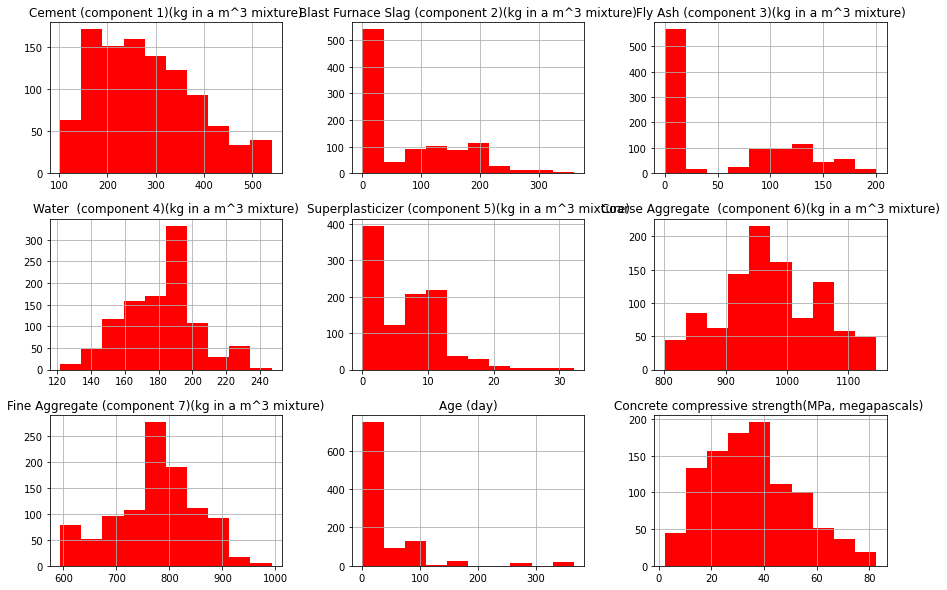

In [10]:
data.hist(figsize=(15,10),color='red')
plt.show()

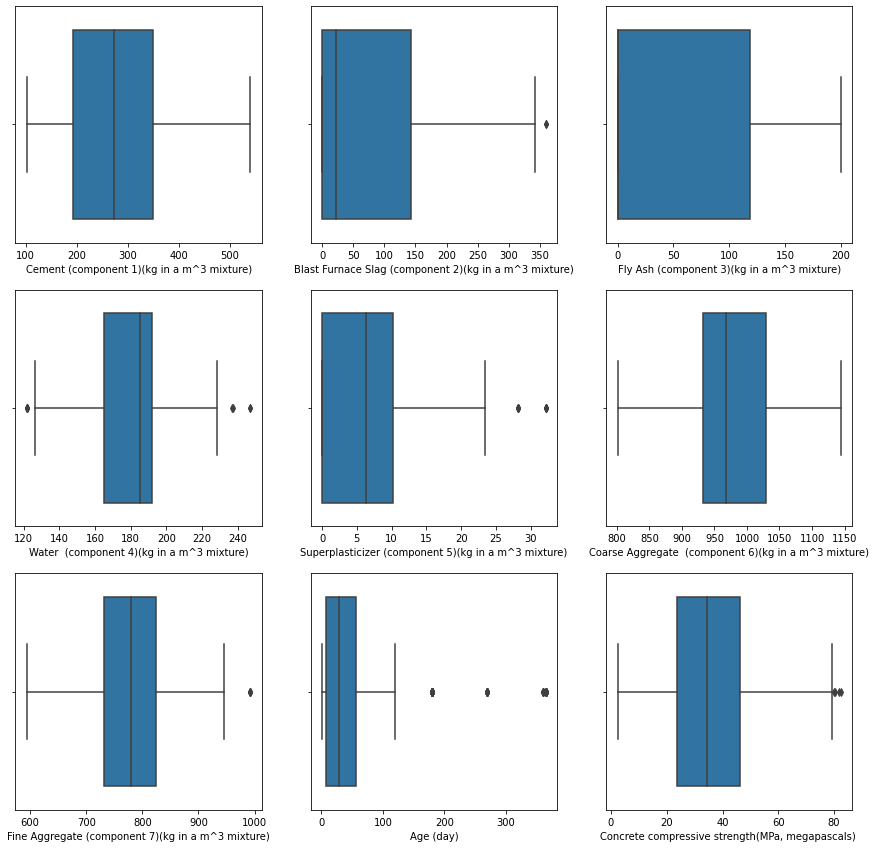

In [11]:

i=1
plt.figure(figsize = (15,20))
for col in data.columns:
    plt.subplot(4,3,i)
    sns.boxplot(x = data[col], data = data)
    i+=1

#### here we have found some outliers,but we did't remove it due to getting loss of data

### BIVARIATE ANALYSIS

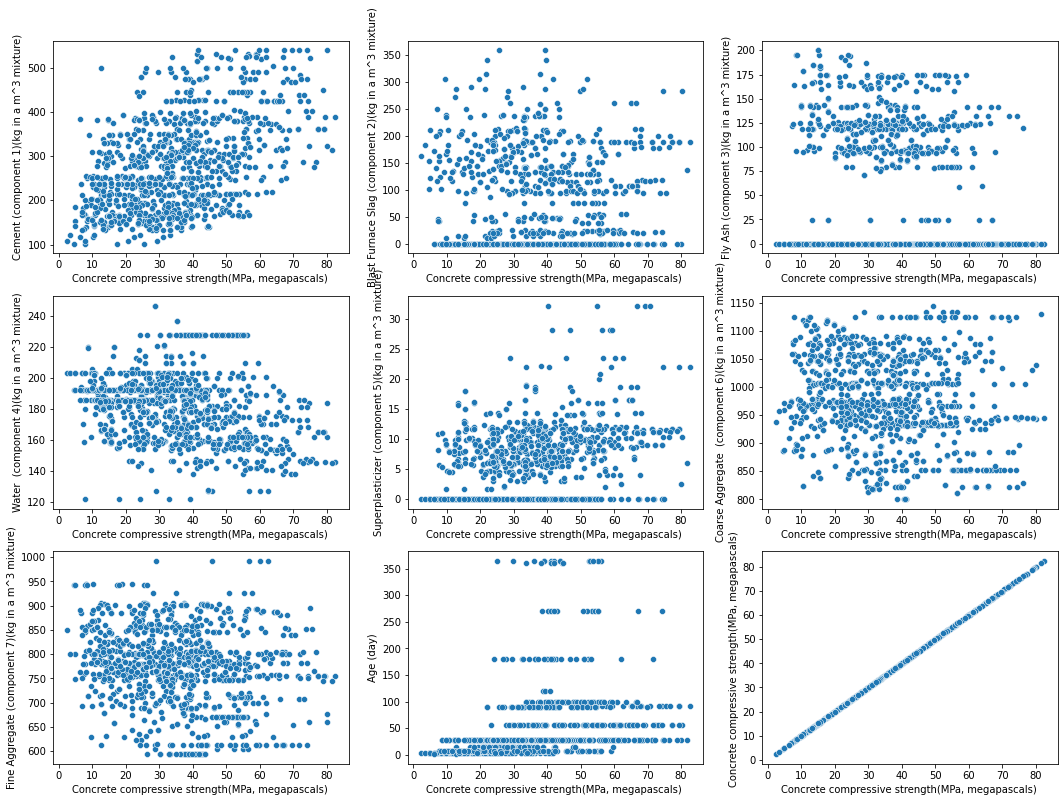

In [12]:
i=1
plt.figure(figsize = (18,18))
for col in data.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=data,x='Concrete compressive strength(MPa, megapascals) ',y=col)
    i+=1

#### we can see that compressive strength is highly correlated with cement

<AxesSubplot:>

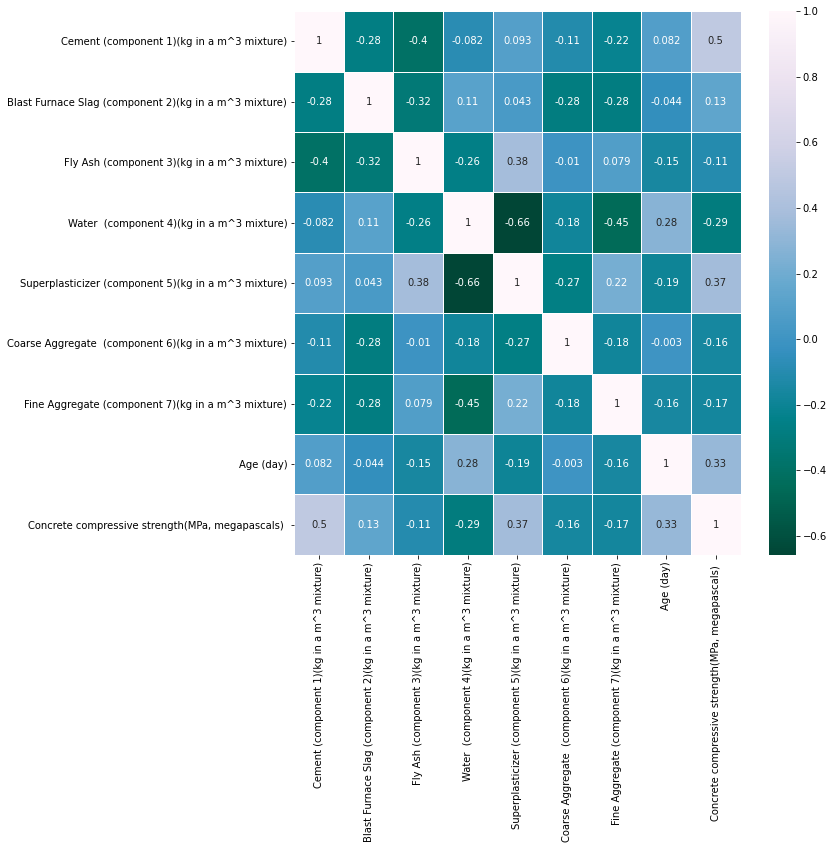

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

In [14]:
correlation=data.corr()['Concrete compressive strength(MPa, megapascals) '].sort_values()

<AxesSubplot:>

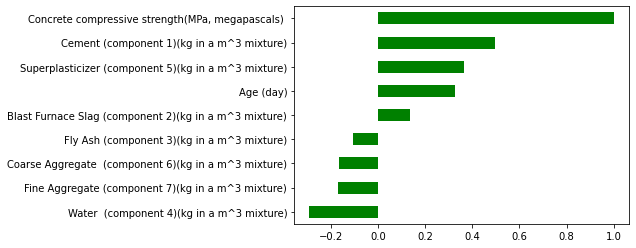

In [15]:
correlation.plot(kind='barh',color='green')

#### we can see that cement, superplasticizer,age,are +vely correlated, while water ,fine aggregate are negatively correlated with compressive strength.

## MODEL SELECTION

In [16]:
X=data.drop(columns='Concrete compressive strength(MPa, megapascals) ')
Y=data[['Concrete compressive strength(MPa, megapascals) ']]

In [17]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=0)

In [19]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()

In [20]:
algo=[lr,sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr]

In [21]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy_train.append(algo[i].score(x_train,y_train))
    accuracy_test.append(algo[i].score(x_test,y_test))
    model.append(algo[i])
    

In [22]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LinearRegression(),0.606594,0.635277
1,SGDRegressor(),0.605693,0.636009
2,Lasso(),0.560683,0.590061
3,Ridge(),0.606561,0.635528
4,"(DecisionTreeRegressor(max_features='auto', ra...",0.983759,0.893598
5,DecisionTreeRegressor(),0.995928,0.783973
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.9509,0.898687
7,(DecisionTreeRegressor(random_state=2024461881...,0.980095,0.888436
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.822327,0.765919
9,KNeighborsRegressor(),0.822674,0.657852


#### we can see that extra tree regressor has the highest accuracy level =90.7%,so we choose for our final model building

### MODEL BUILDING

In [23]:
etr1=ExtraTreesRegressor()

In [24]:
rs=[]
score=[]
for i in range(1,200,1):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=i)
    etr1.fit(x_train,y_train)
    score.append(etr1.score(x_test,y_test))
    rs.append(i)

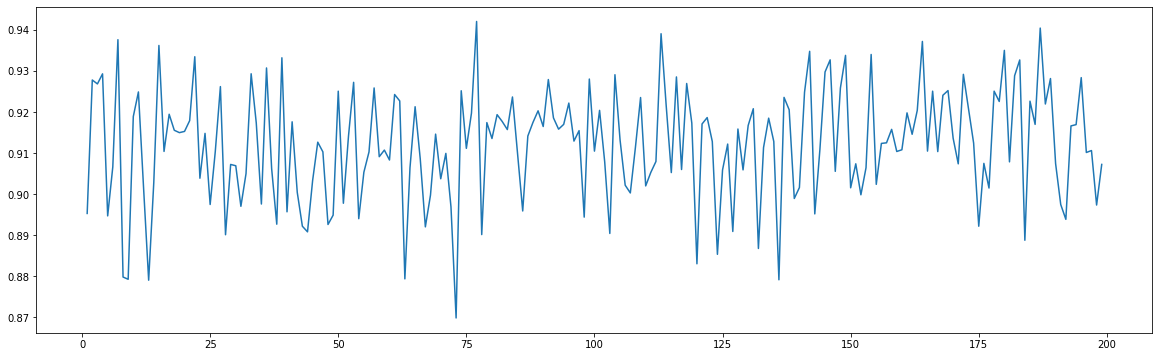

In [25]:
plt.figure(figsize=(20,6))
plt.plot(rs,score)

In [26]:
for i in range(len(score)):
    print(rs[i],score[i])

1 0.89529318226024
2 0.9277744539369183
3 0.926825810368096
4 0.929277398220312
5 0.8946985733005189
6 0.9066382335271965
7 0.9375909152276649
8 0.8798177784082443
9 0.8792678508590264
10 0.9188761161352978
11 0.9248721043508471
12 0.9016606370091849
13 0.8790450510199522
14 0.90286206857159
15 0.9361845117635051
16 0.9103918559878086
17 0.9194389042700499
18 0.9155440974047644
19 0.9149623543026111
20 0.9152627650581631
21 0.9178825939342906
22 0.933442676595351
23 0.9038669999821688
24 0.9147860597553644
25 0.8974741270279977
26 0.9103415974014989
27 0.926171116031605
28 0.8901152376661319
29 0.9072214319234586
30 0.9069034544309591
31 0.8970305284171736
32 0.9049887830584175
33 0.9292951198961779
34 0.9173185581763424
35 0.8975881402027748
36 0.9307101720411162
37 0.9062267343439251
38 0.8926768812818899
39 0.9331845652934211
40 0.8956891147838116
41 0.9175997008124308
42 0.9004182578884321
43 0.8921783511284366
44 0.890816545901059
45 0.9033256046629572
46 0.91264162638476
47 0.910

#### we can see that at random state =77,we get a accuracy=94.39%

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=77)
etr2=ExtraTreesRegressor()

In [28]:
etr2.fit(x_train,y_train)
etr2.score(x_train,y_train)

0.9956848757880896

In [29]:
etr2.score(x_test,y_test)

0.9430755998275114

In [30]:
y_test_pred=etr2.predict(x_test)

In [31]:
y_test1=y_test.copy()
y_test1['pred']=y_test_pred

In [32]:
y_test1.corr()

,"Concrete compressive strength(MPa, megapascals)",pred
"Concrete compressive strength(MPa, megapascals)",1.000000,0.972377
pred,0.972377,1.000000


#### we can see here the accuracy is to be 97.17%

In [33]:
from sklearn.metrics import  mean_squared_error,r2_score

In [34]:
mean_squared_error(y_test1[ 'Concrete compressive strength(MPa, megapascals) '],y_test1['pred'])

16.72617571252238

In [35]:
rsme=np.sqrt(mean_squared_error(y_test1[ 'Concrete compressive strength(MPa, megapascals) '],y_test1['pred']))
rsme

4.089764750266497

#### we can see that root mean sqaure error is only 4.15 , which shows that our model is very good

In [36]:
r2_score(y_test1[ 'Concrete compressive strength(MPa, megapascals) '],y_test1['pred'])

0.9430755998275114

<BarContainer object of 8 artists>

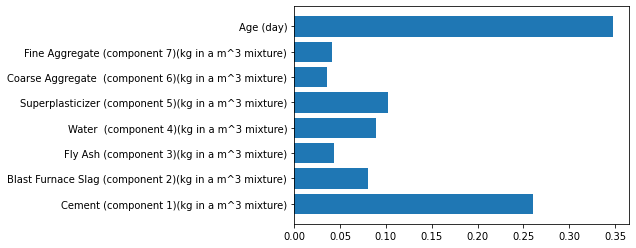

In [37]:
plt.barh(X.columns,etr2.feature_importances_)

#### we can also see that age and cement is most important feature 